## Image Features Extraction with Machine Learning

#### Local Image Characterstic

A tiny patch in the image that is indifferent to the image scaling, rotation, and lighting change. It is geometric and photometrically invariant.

#### Necessary Libraries

In [5]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

#### Let's Load the image to perform the task

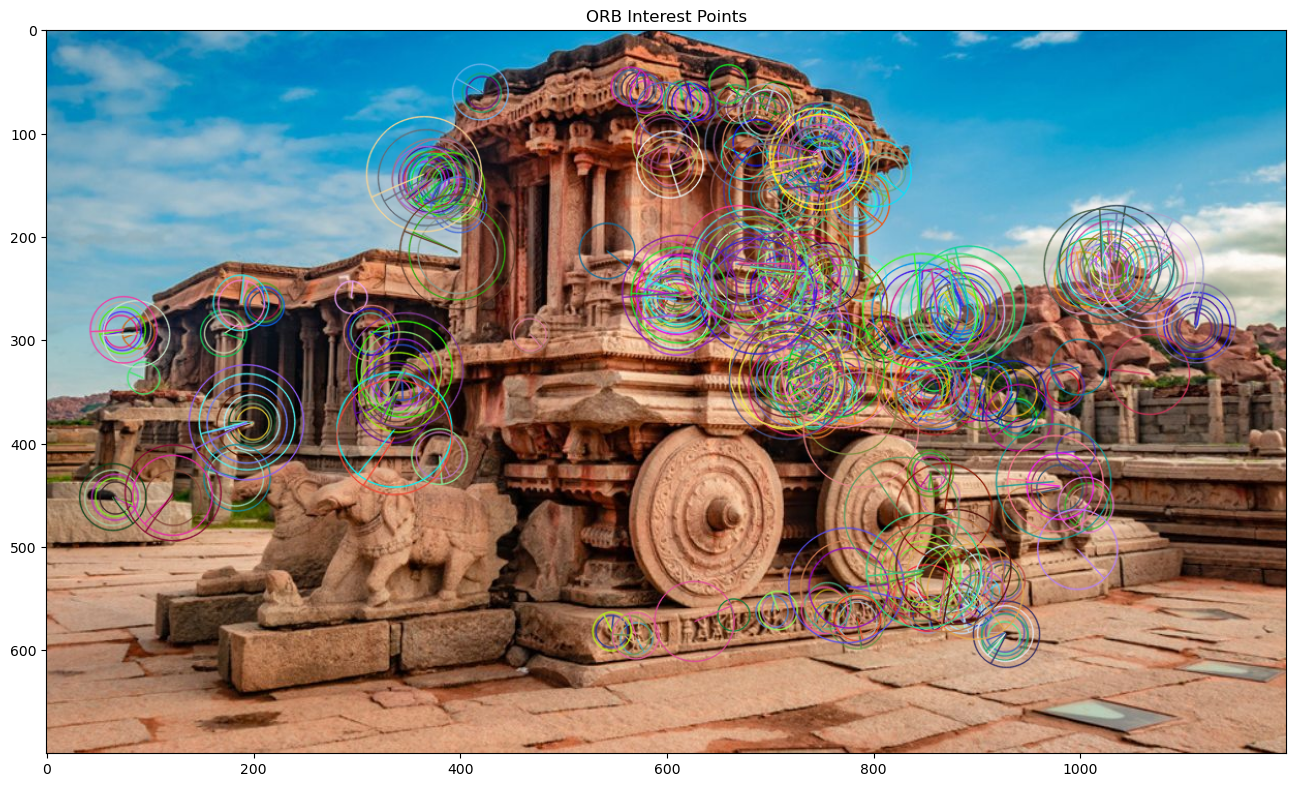

In [11]:
img_monument = cv2.imread(os.path.join('hampi-1.jpg'))
img_monument = cv2.cvtColor(img_monument, cv2.COLOR_BGR2RGB)
orb = cv2.ORB_create()
key_points, description = orb.detectAndCompute(img_monument, None)
img_monument_keypoints = cv2.drawKeypoints(img_monument, key_points, img_monument, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_monument_keypoints)
plt.show()

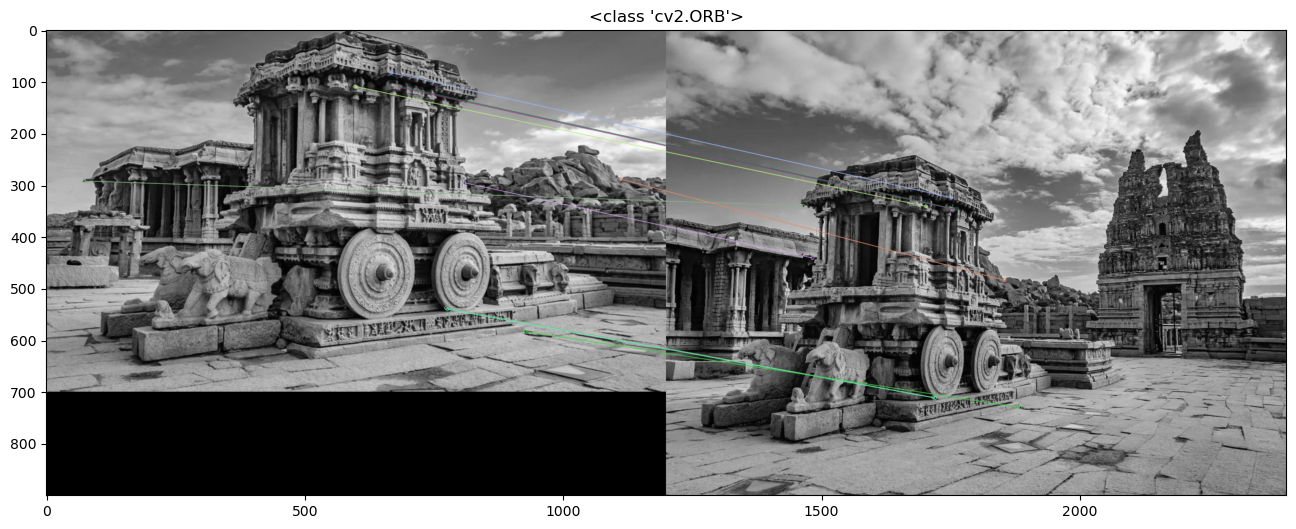

In [16]:
def image_detect_and_compute(detector, img_name):
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des

def draw_image_matches(detector, img1_name, img2_name, nmatches = 10):
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance)
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2)
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches)
    plt.show()
    
orb = cv2.ORB_create()
draw_image_matches(orb, 'hampi-1.jpg', 'hampi-2.jpeg')